# Local Search Implementation on Diagonal Magic Cube
## Made by:
- Jeremy Deandito / 18222112 

- Nathaniel Liady / 18222114

- Gabriel Marcellino / 18222115

- Nicolas Jeremy / 18222135

## Import relevant libraries

In [1]:
from tensor import *

from simulated import *
from hill_climb import *
from random_restart import *


import numpy as np

## Cube Initialization

### Goal State
 Final state cube we are trying to achieve.<br><br> 
 The ideal state

In [2]:
goal_state = [

# Level 1
[
    [33, 22, 113, 42, 105],
    [2, 89, 106, 19, 99],
    [85, 82, 4, 119, 25],
    [98, 90, 6, 112, 9],
    [97, 32, 86, 23, 77]
],
# Level 2
[
    [95, 80, 111, 11, 18],
    [91, 55, 65, 69, 35],
    [16, 66, 70, 53, 110],
    [5, 68, 54, 67, 121],
    [108, 46, 15, 115, 31]
],
# Level 3
[
    [100, 17, 48, 34, 116],
    [114, 75, 52, 62, 12],
    [83, 50, 63, 76, 43],
    [8, 64, 74, 51, 118],
    [10, 109, 78, 92, 26]
],
# Level 4
[
    [38, 102, 3, 125, 47],
    [81, 59, 72, 58, 45],
    [30, 73, 56, 60, 96],
    [87, 57, 61, 71, 39],
    [79, 24, 123, 1, 88]
],
# Level 5
[
    [49, 94, 40, 103, 29],
    [27, 37, 20, 107, 124],
    [101, 44, 122, 7, 41],
    [117, 36, 120, 14, 28],
    [21, 104, 13, 84, 93]
]
]

In [3]:
goal_cube = Tensor(5,5,5,initial_array=goal_state)

In [4]:
obj_func_goal = goal_cube.objective_function()
print(f"goal cube objective function value: {obj_func_goal}")

goal cube objective function value: 21895.0


### Problem Cube Initialization

In [5]:
problem_cube = Tensor(5,5,5)

cube = problem_cube.initial_state()

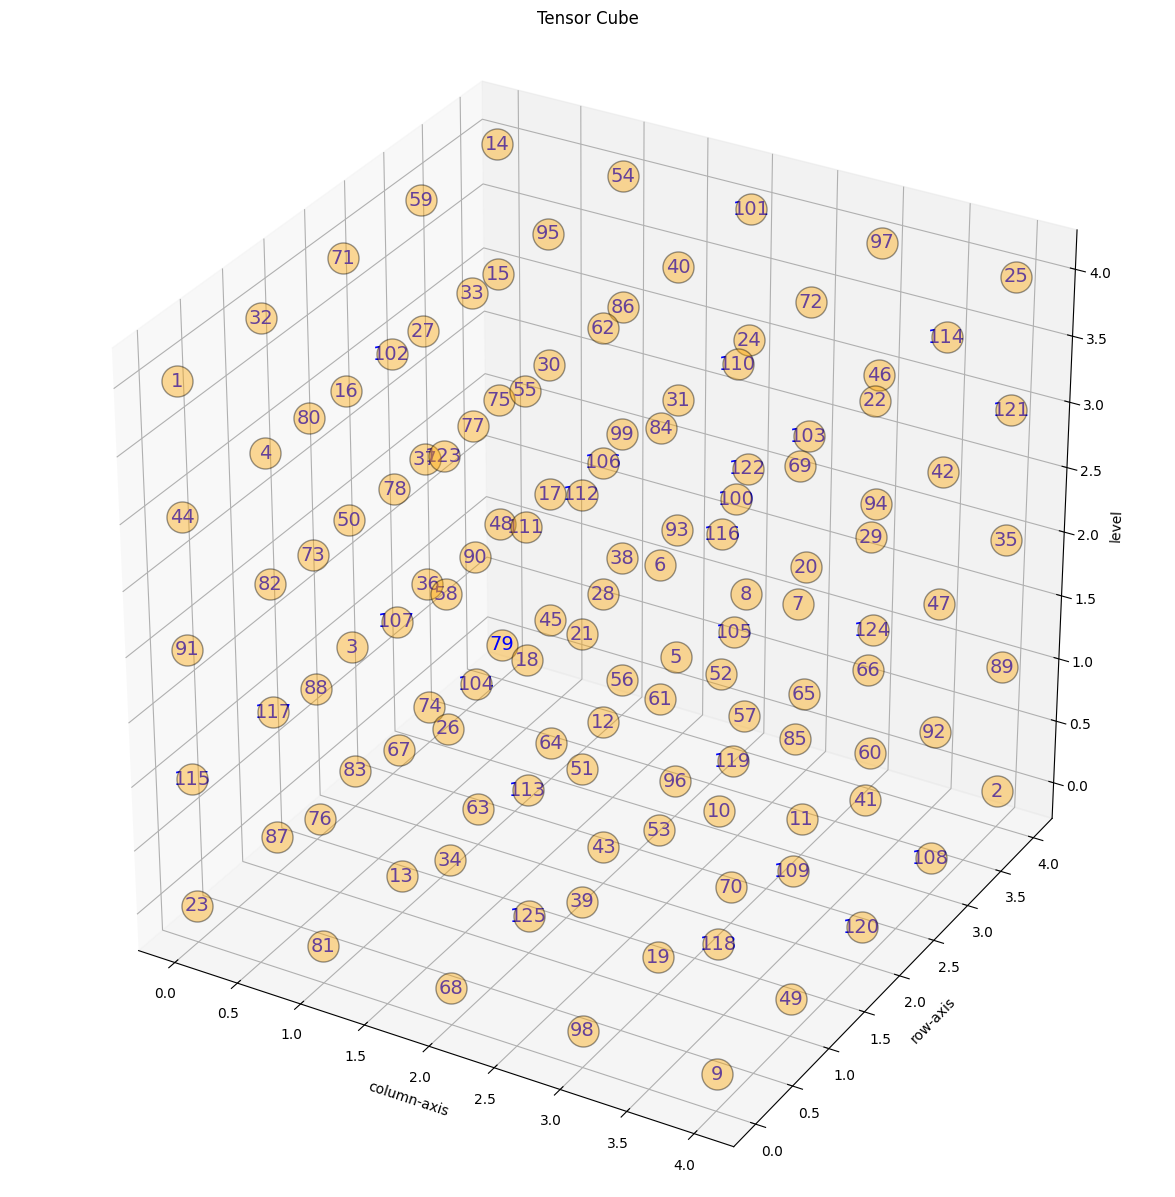

In [6]:
cube.plot_cube()

In [7]:
cube.print_tensor()

Level: 1

[23 87 83 74 79]
[81 13 63 64 56]
[ 68 125  43  96  57]
[98 19 70 11 60]
[  9  49 120 108   2]

Level: 2

[115 117   3  36  48]
[ 76  67 104  45  38]
[ 34 113  12   5   8]
[ 39  53 119  65 124]
[118 109  41  92  89]

Level: 3

[91 82 50 37 75]
[ 88 107  90  17  99]
[ 26  18  28  93 122]
[ 51  61 105  20  94]
[10 85 66 47 35]

Level: 4

[44  4 16 27 15]
[73 78 77 30 86]
[ 58 111 106  31  24]
[ 21   6 100 103  46]
[ 52   7  29  42 121]

Level: 5

[ 1 32 71 59 14]
[ 80 102  33  95  54]
[123  55  62  40 101]
[112  84 110  72  97]
[116  69  22 114  25]



In [8]:
# cube.plot_per_level()

In [9]:
obj_func = cube.objective_function()
print(f"cube's objective function: {obj_func}")

cube's objective function: 539447.0


## Local Seach Implementation

### Steepest Ascent Hill-Climbing

In [10]:
print(f"ideal objective function {obj_func_goal}")

ideal objective function 21895.0


In [11]:
HC = Hill_climb(cube=cube)

Initial Value: 539447.0

Step 1: Choosen Neighbor Value: 457578.0; Best Value: 539447.0
Step 2: Choosen Neighbor Value: 366675.0; Best Value: 457578.0


In [12]:
HC.results()

+------------------------ RESULTS -------------------------+

    final step: 3

  final Value: 366675.000000

+-------------------------- END ---------------------------+


In [13]:
print(f"differences from ideal: {HC.best_value - obj_func_goal}")

differences from ideal: 344780.0


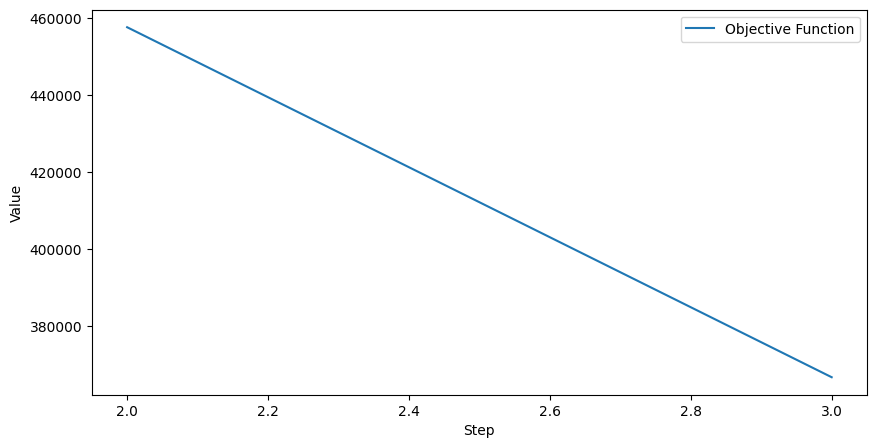

In [14]:
HC.hist_plot()

### Random Restart Hill-Climbing


In [15]:
print(f"ideal objective function {obj_func_goal}")

ideal objective function 21895.0


In [16]:
RR = Random_restart(cube=cube)

Initial Value: 539447.0

Initial Value: 539447.0

Step 1: Choosen Neighbor Value: 412261.0; Best Value: 539447.0
Step 2: Choosen Neighbor Value: 342136.0; Best Value: 412261.0
Initial Value: 539447.0

Step 1: Choosen Neighbor Value: 449797.0; Best Value: 539447.0
Step 2: Choosen Neighbor Value: 426973.0; Best Value: 449797.0
Initial Value: 539447.0

Step 1: Choosen Neighbor Value: 440400.0; Best Value: 539447.0
Step 2: Choosen Neighbor Value: 378242.0; Best Value: 440400.0
Step 3: Choosen Neighbor Value: 358787.0; Best Value: 378242.0
Initial Value: 539447.0

Step 1: Choosen Neighbor Value: 396481.0; Best Value: 539447.0
Step 2: Choosen Neighbor Value: 395370.0; Best Value: 396481.0
Step 3: Choosen Neighbor Value: 348600.0; Best Value: 395370.0
Initial Value: 539447.0

Step 1: Choosen Neighbor Value: 420912.0; Best Value: 539447.0
Initial Value: 539447.0

Step 1: Choosen Neighbor Value: 424040.0; Best Value: 539447.0
Initial Value: 539447.0

Step 1: Choosen Neighbor Value: 411782.0; Be

In [17]:
RR.results()

+------------------------ RESULTS -------------------------+

    Best iteration: 54

  final Value: 261000.000000

+-------------------------- END ---------------------------+


In [18]:
print(f"differences from ideal: {RR.best_value - obj_func_goal}")

differences from ideal: 239105.0


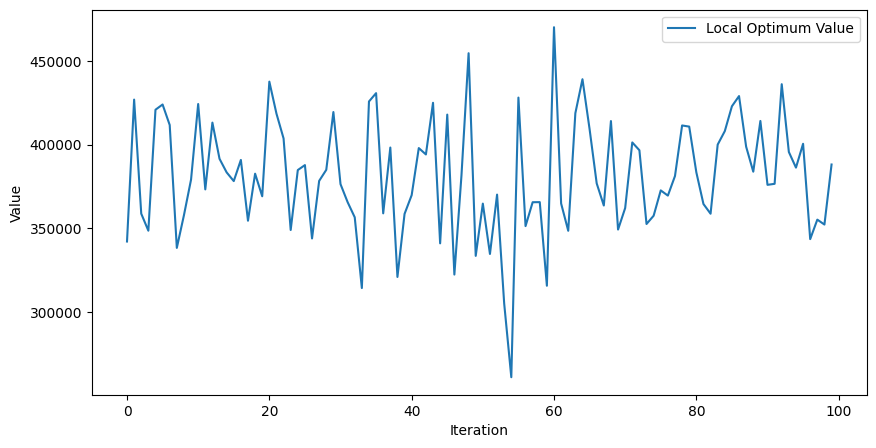

In [19]:
RR.hist_plot()

### Simulated Annealing

In [20]:
print(f"ideal objective function {goal_cube.objective_function()}")

ideal objective function 21895.0


In [21]:
SA = Simulated(cube=cube,tmax=10000,step_max=10000,cooling_schedule="quadratic",alpha=0.999)

Initial Energy: 539447.0

Step:1, Energy: 539447.0, Best Energy: 539447.0,Temperature: 10000

Step:2, Energy: 540059.0, Best Energy: 539447.0,Temperature: 5002.501250625312

Step:3, Energy: 534665.0, Best Energy: 539447.0,Temperature: 2001.6012810248196

Step:4, Energy: 534539.0, Best Energy: 534665.0,Temperature: 1000.9008107296568

Step:5, Energy: 534957.0, Best Energy: 534539.0,Temperature: 588.7894488930758

Step:6, Energy: 559866.0, Best Energy: 534539.0,Temperature: 384.98556304138594

Step:7, Energy: 562286.0, Best Energy: 534539.0,Temperature: 270.53349204631536

Step:8, Energy: 568222.0, Best Energy: 534539.0,Temperature: 200.19619226842306

Step:9, Energy: 571390.0, Best Energy: 534539.0,Temperature: 153.99778243193296

Step:10, Energy: 575518.0, Best Energy: 534539.0,Temperature: 122.0718026343095

Step:11, Energy: 551598.0, Best Energy: 534539.0,Temperature: 99.10802775024777

Step:12, Energy: 570012.0, Best Energy: 534539.0,Temperature: 82.04858917450915

Step:13, Energy: 

In [22]:
SA.results()

+------------------------ RESULTS -------------------------+

cooling sched.: quadratic multiplicative
  initial temp: 10000
    final temp: 0.00010010009909809711
    final step: 10001

  final energy: 267875.000000

+-------------------------- END ---------------------------+


In [23]:
print(f"differences from ideal: {SA.best_energy - obj_func_goal}")

differences from ideal: 245980.0


In [24]:
SA.best_energy

267875.0

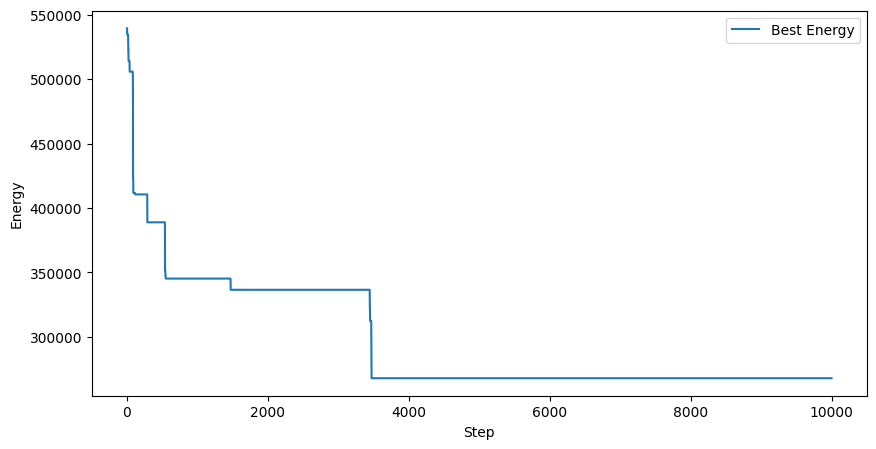

In [25]:
SA.hist_plot()

### Genetic Algorithm
